# KNN Using light sensor

### Setup

In [61]:
import random, heapq, rpyc
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from IPython import display



conn = rpyc.classic.connect("ev3dev.local") # host name or IP address of the EV3
ev3 = conn.modules['ev3dev2']      # import ev3dev2.ev3 remotely

legosensors=conn.modules['ev3dev2.sensor.lego']
sensor_controls=conn.modules['ev3dev2.sensor']
sound=conn.modules['ev3dev2.sound']
led_controls=conn.modules['ev3dev2.led']

led=led_controls.Leds()
sound=sound.Sound()
        

In [62]:
out1=sensor_controls.INPUT_1
out2=sensor_controls.INPUT_2
out3=sensor_controls.INPUT_3

touch = legosensors.TouchSensor(out3)
touchstop = legosensors.TouchSensor(out2)
color =legosensors.ColorSensor(out1)


In [57]:
def dist(color1,color2):
    col1=list(color1)
    col2=list(color2)
    return(np.sqrt((col1[0]-col2[0])**2+(col1[1]-col2[1])**2+(col1[2]-col2[2])**2))


### Data

In [58]:
colorlist=[
    ("Black",(0,0,0)),
    ("Blue",(0,0,255)),
    ("Red",(255,0,0)),
    ("Green",(0,255,0)),
    ("Yellow",(255,255,0)),
    ("White",(255,255,255))
]

In [59]:
while True:
    if touch.is_pressed:
        colorlist.append((color.color_name,color.raw))
        
    if touchstop.is_pressed:
        break

In [68]:
def Plot3d(point,dictionary):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for colortuple in dictionary:

        ax.scatter(colortuple[1][0], colortuple[1][1], colortuple[1][2], c=colortuple[0],)
    
    
    ax.scatter(point[0],point[1],point[2],c="Black",marker="^")
    
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

    return(fig)

    

In [64]:
def colorKNN(distlist,k):
    dists=[dist[1] for dist in distlist]
    limit=max(heapq.nsmallest(k,dists))
    kcolors=defaultdict(int)
    for colortuple in distlist:
        if colortuple[1]<=limit:
            kcolors[colortuple[0]]+=1

    maxcolor=max([item for key,item in kcolors.items()])
    returncolors=[]
    for key,item in kcolors.items():
        if item>=maxcolor:
            returncolors.append(key)
            
    return(random.choice(returncolors))
    
    

### Execution

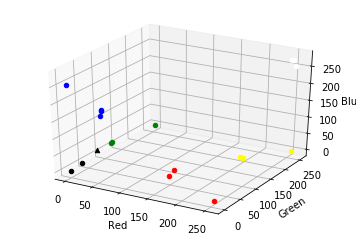

None

In [70]:
k=2
while True:
    if touch.is_pressed:
        color_raw=color.raw
                
        distlist=[]
        for colortuple in colorlist:
            distlist.append((colortuple[0],dist(colortuple[1],color_raw)))

        bestcolor=colorKNN(distlist,k)
                
        
        
        
        display.clear_output(wait=True)
        display.display(Plot3d(color_raw,colorlist))

        sound.speak(bestcolor)
        
        
    if touchstop.is_pressed:
        break